In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import copy

In [2]:
def grabCut(img, mask=None, rect=None, iterCount=5, mode=cv.GC_INIT_WITH_RECT, show=True):
    h = img.shape[0]
    w = img.shape[1]
    
    if mask is None: mask_ = np.zeros((h,w),np.uint8)
    else: mask_ = copy.deepcopy(mask)
    if rect is None: rect_ = (1,1,h-2,w-2) # 사각형이 그림보다 작아야 됨
    else: rect_ = copy.deepcopy(rect)
    bgdModel = np.zeros((1,65), np.float64)
    fgdModel = np.zeros((1,65), np.float64)
    
#    mask_[int(h/2), int(w/2)] = 3 # 중앙에 있는 점이 전경일 것이라 추측
    
    cv.grabCut(img, mask_, rect_, bgdModel, fgdModel, iterCount, mode)
    mask2 = np.where((mask_==2)|(mask_==0),0,1).astype('uint8')
    img_ = img*mask2[:,:,np.newaxis]
    
    if show:
        plt.imshow(img_)
        plt.colorbar()
        plt.show()
    
    return img_, mask_

In [3]:
codes = ['TS', 'TR', 'PU', 'DR', 'CO', 'SA', 'SH', 'SN', 'BA', 'AN']

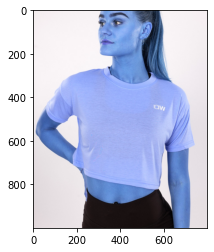

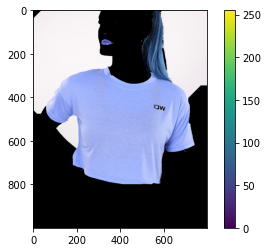

In [27]:
img = cv.imread('../img/TS001.jpg')
plt.imshow(img), plt.show()
[img_, mask_] = grabCut(img)

In [58]:
mask_.shape

(1000, 800)

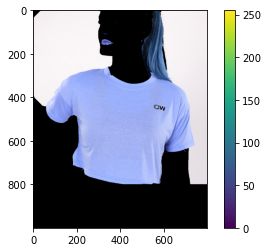

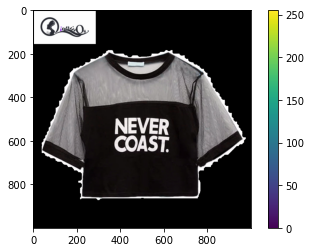

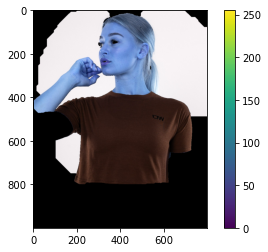

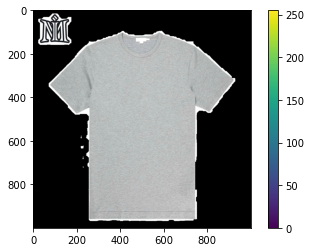

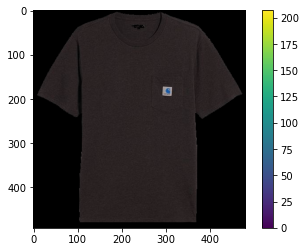

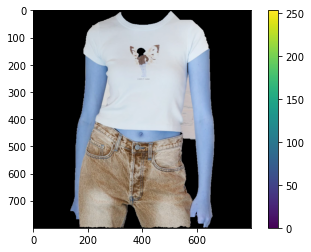

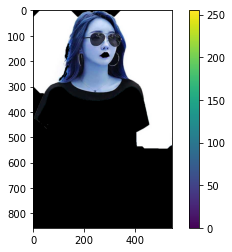

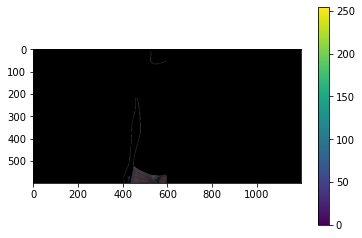

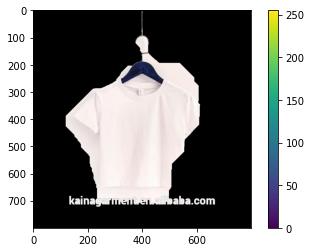

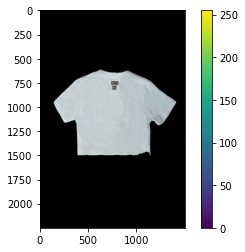

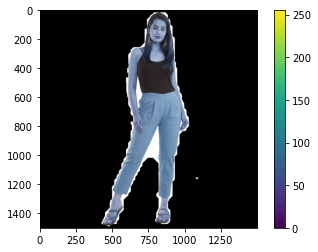

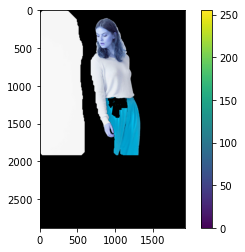

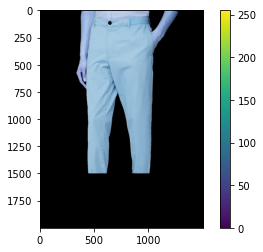

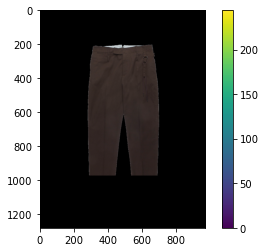

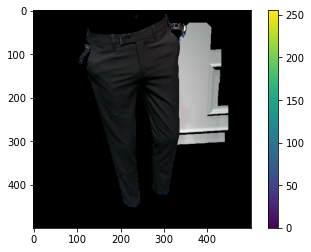

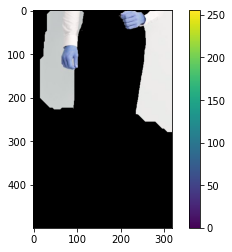

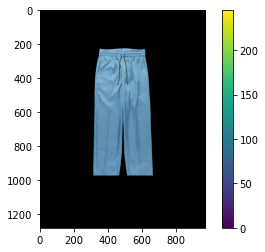

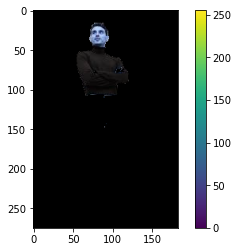

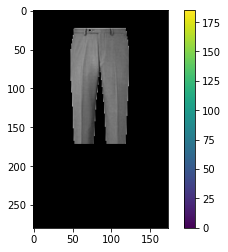

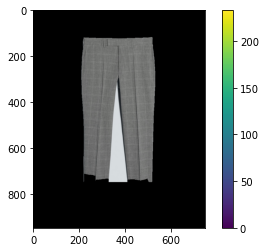

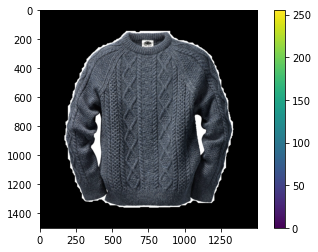

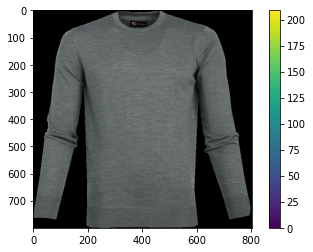

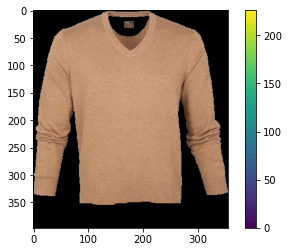

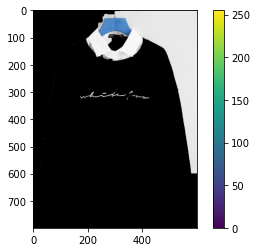

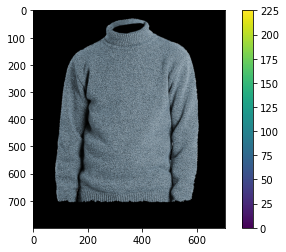

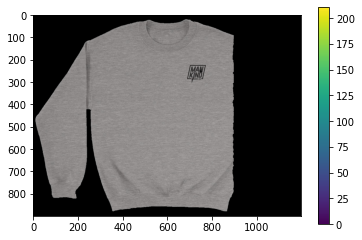

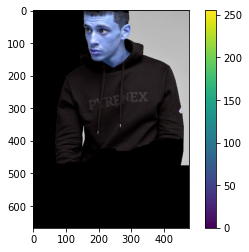

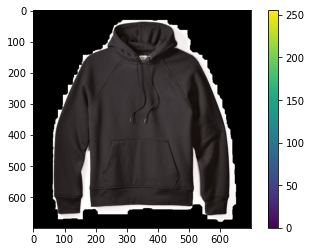

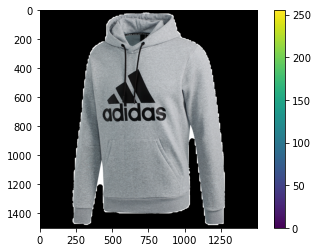

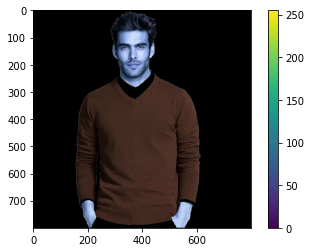

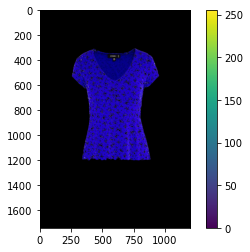

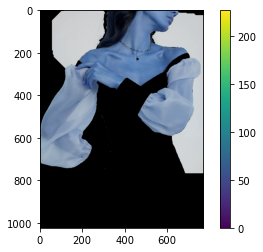

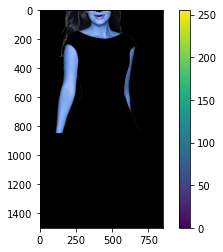

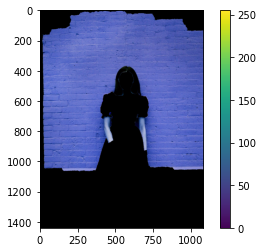

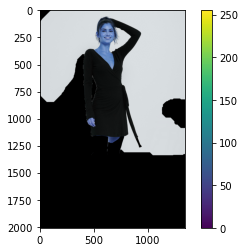

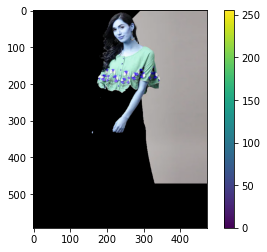

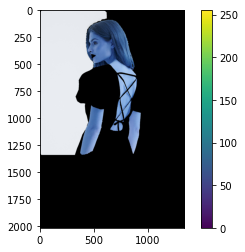

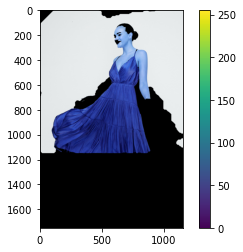

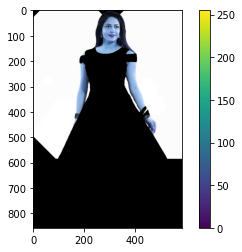

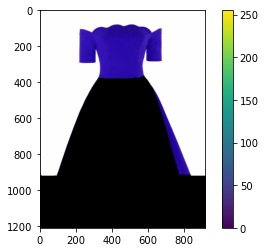

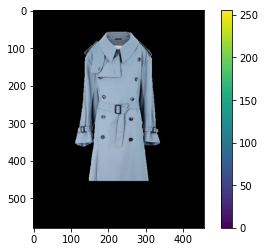

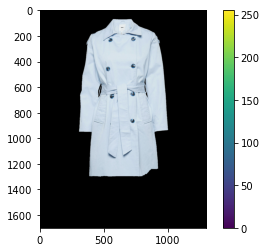

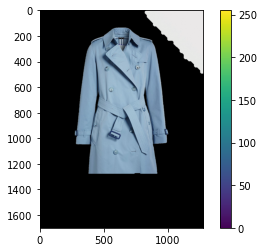

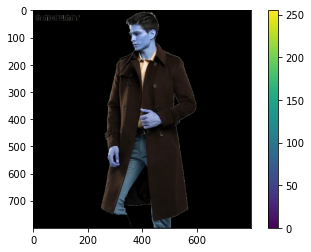

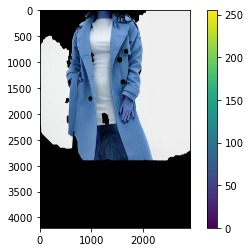

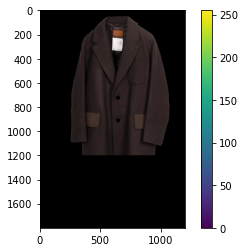

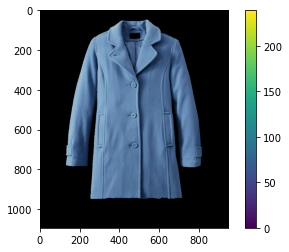

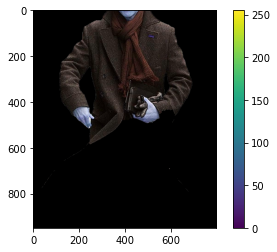

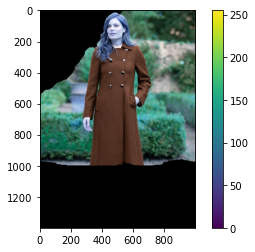

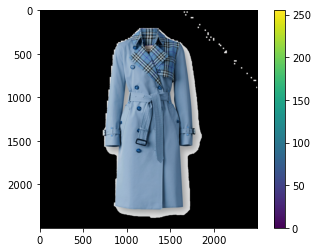

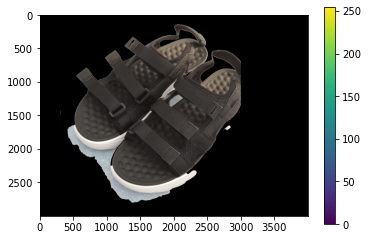

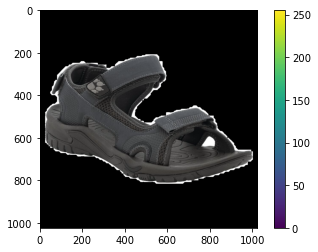

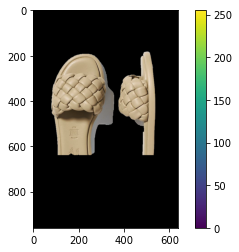

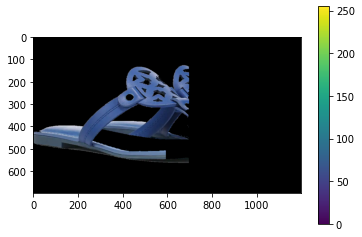

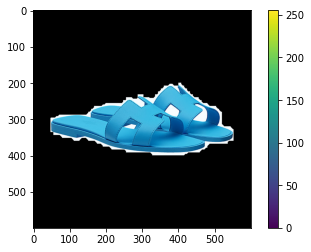

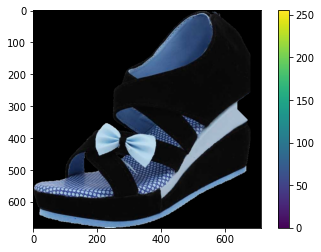

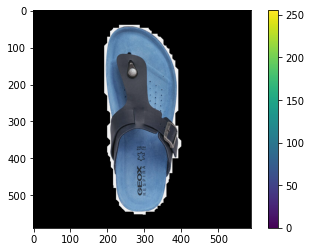

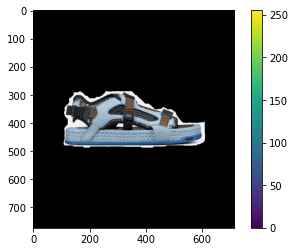

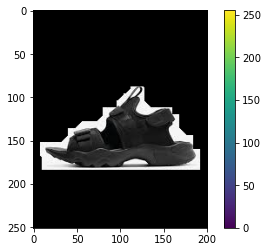

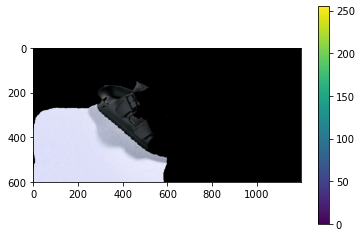

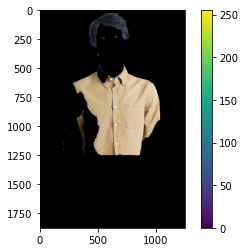

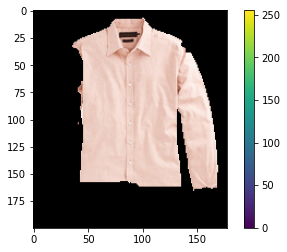

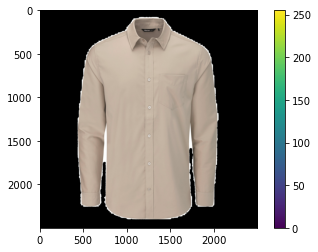

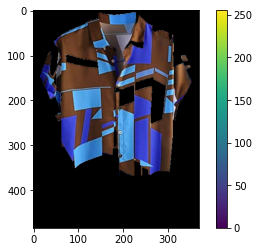

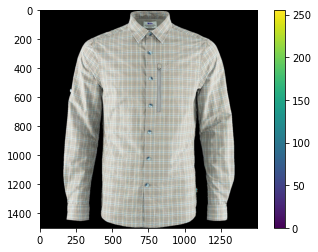

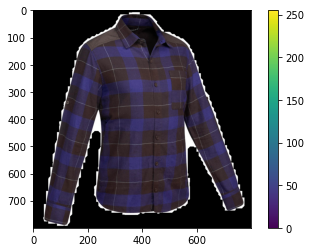

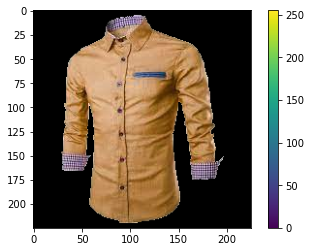

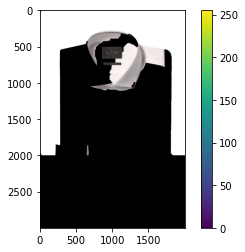

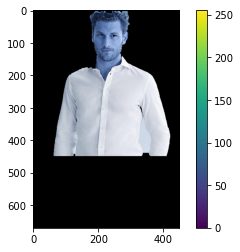

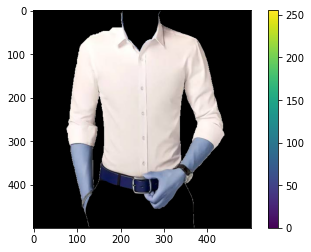

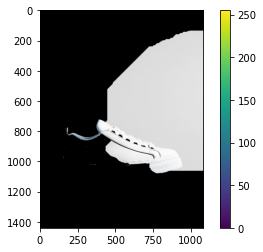

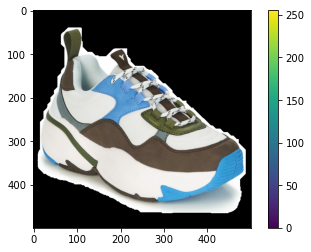

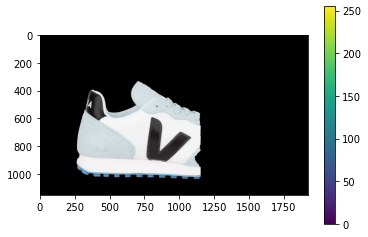

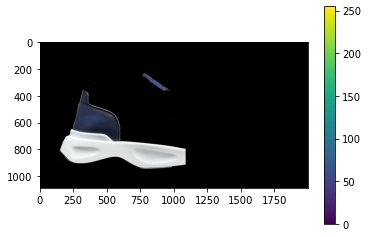

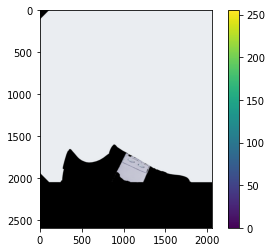

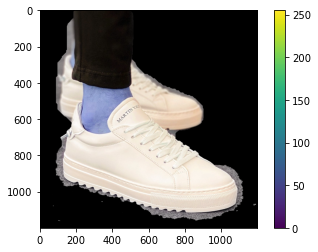

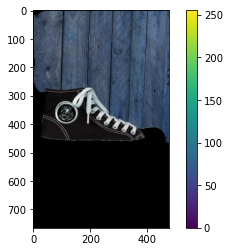

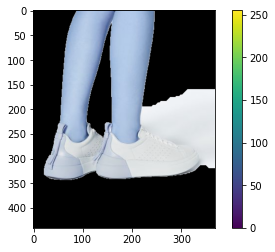

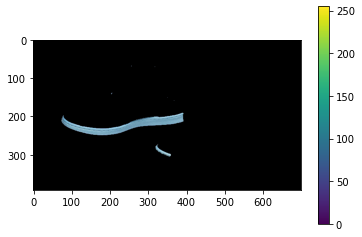

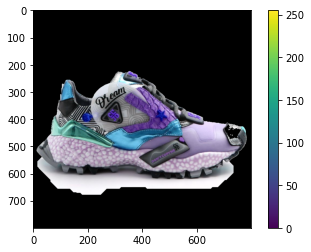

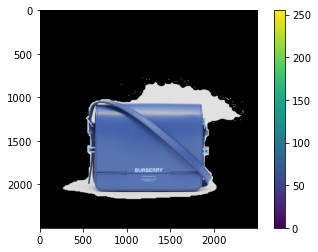

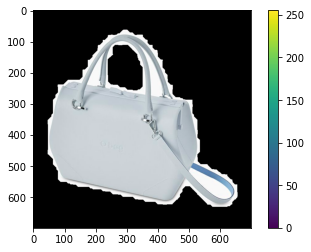

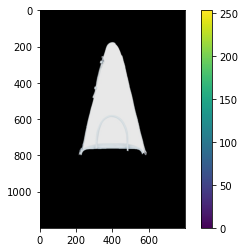

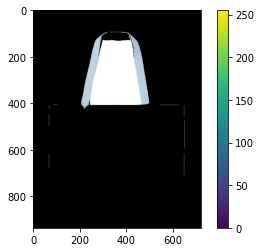

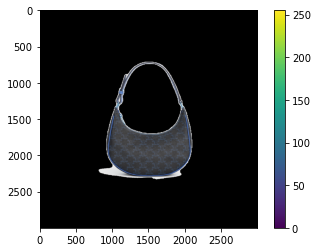

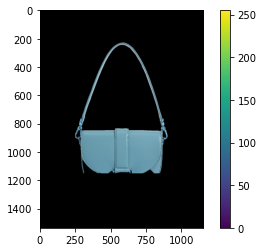

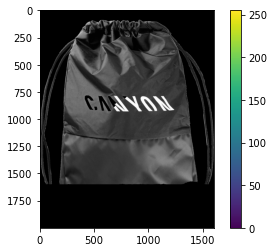

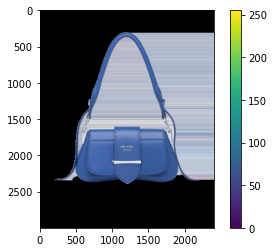

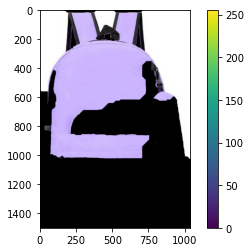

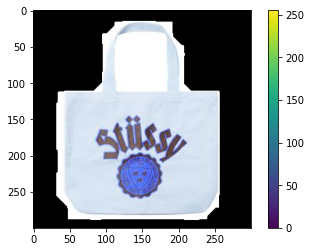

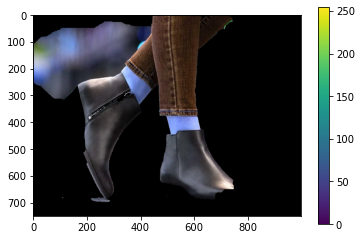

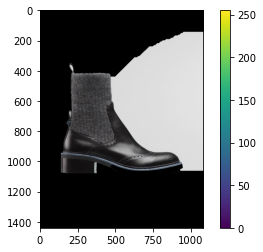

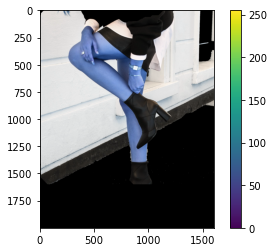

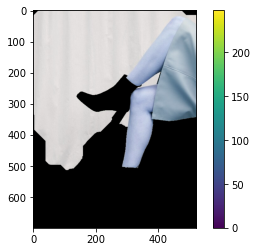

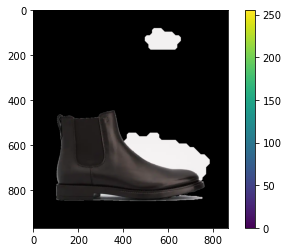

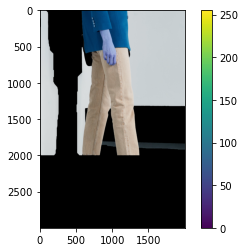

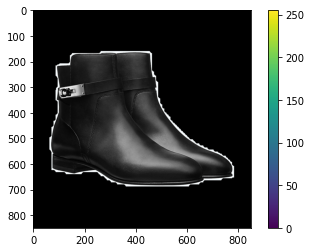

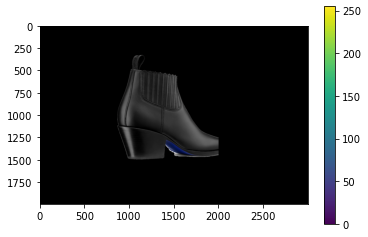

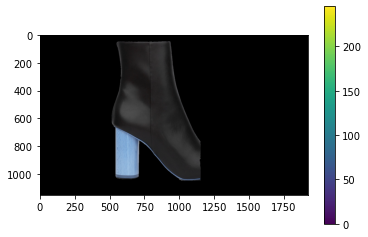

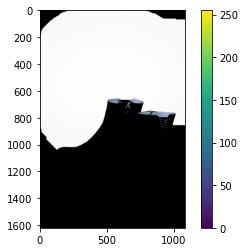

In [4]:
for code in codes:
    for i in range(10):
        path = '../img/' + code + '%03d' %(i+1) + '.jpg'
        img = cv.imread(path)
        [img_, mask_] = grabCut(img)
        
        path_ = '../img/' + code + '%03d_' %(i+1) + '.jpg'
        cv.imwrite(path_, img_)